In [108]:
!pip install ucimlrepo

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [110]:
# breast_df = pd.read_csv('wdbc.data',header=None,sep=',')

# fetch dataset
breast_df = fetch_ucirepo(id=17).data.features
breast_dt = fetch_ucirepo(id=17).data.targets

header=0 : 表示CSV文件第一行是列名,将第一个行作为列名读取
header=1 : 表示CSV文件的第二行是列名,将第二行作为列名读取,跳过第一个行header=None : 表示CSV文件没有列名行,将默认的'col1','co12'等作为列名

In [111]:
breast_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [112]:
breast_dt

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [113]:
breast_df_origin = breast_df.copy()

In [114]:
# check if there exists missing data
miss_data = breast_df_origin.isna().sum()

In [115]:
# Handle missing values with mean imputation
if miss_data.sum() > 0:
  breast_df_origin.fillna(breast_df_origin.mean(),inplace=True)

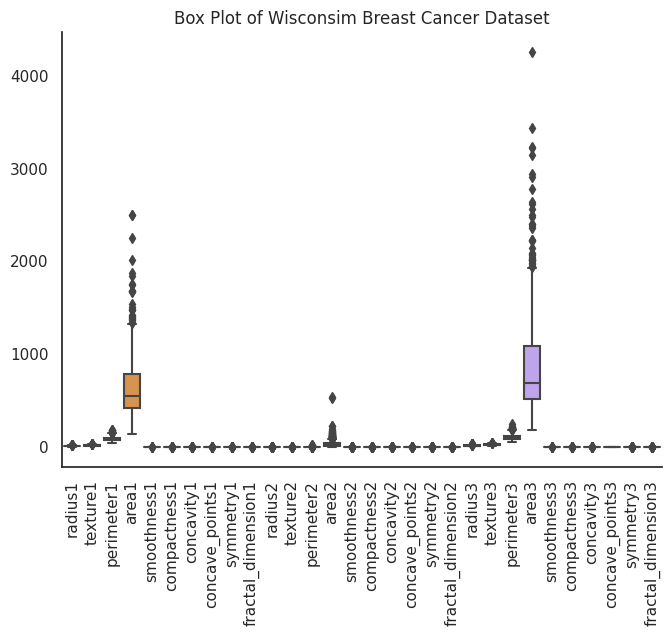

In [116]:
# draw box plot of Wisconsim Breast Cancer Dataset
sns.catplot(kind='box',data=breast_df_origin,height=5,aspect=1.5)
plt.xticks(rotation=90)
plt.title('Box Plot of Wisconsim Breast Cancer Dataset')
plt.savefig('plot.png')
plt.show()

In [117]:
# 0 for benign and 1 for malignant
breast_dt['Diagnosis'] = breast_dt['Diagnosis'].map({'B':0,'M':1})

In [118]:
breast_dt

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [119]:
train_df,test_df = train_test_split(breast_df,test_size=0.2,random_state=22)
train_dt,test_dt = train_test_split(breast_dt,test_size=0.2,random_state=22)

In [120]:
# Rescale attributes to the interval [0, 1] using min-max scaling
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df),columns=train_df.columns)
test_df = pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

In [121]:
train_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.203193,0.355100,0.213137,0.115936,0.470286,0.398062,0.296495,0.270883,0.626768,0.612142,...,0.297566,0.421862,0.329978,0.165021,0.628472,0.533816,0.555591,0.532553,0.800401,0.558573
1,0.507322,0.246265,0.513948,0.358534,0.425890,0.593738,0.409932,0.564558,0.551515,0.366237,...,0.501133,0.173279,0.486045,0.343986,0.520478,0.520137,0.302396,0.724079,0.547458,0.365735
2,0.281551,0.478020,0.271847,0.168454,0.174856,0.114517,0.075706,0.106168,0.365657,0.129067,...,0.265039,0.479352,0.244065,0.140011,0.259662,0.171736,0.166534,0.383052,0.357876,0.107700
3,0.247759,0.269740,0.245730,0.138763,0.486429,0.274133,0.094450,0.156560,0.535354,0.355318,...,0.210949,0.249663,0.198973,0.099370,0.518441,0.165527,0.113658,0.277127,0.377160,0.200249
4,0.302121,0.279556,0.305864,0.175277,0.386540,0.398372,0.241018,0.292838,0.528283,0.419306,...,0.258461,0.389744,0.253724,0.130632,0.508252,0.397503,0.370288,0.569755,0.517155,0.333596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.497527,0.121639,0.474096,0.352570,0.142165,0.120294,0.108204,0.218400,0.080808,0.053942,...,0.407207,0.160054,0.369122,0.244740,0.186443,0.070311,0.083706,0.287323,0.054596,0.024072
451,0.237475,0.253521,0.236763,0.131254,0.519726,0.264194,0.144304,0.171406,0.445960,0.352915,...,0.178788,0.240486,0.163591,0.081481,0.589758,0.143406,0.150879,0.289735,0.398197,0.133412
452,0.058132,0.218096,0.062340,0.030293,0.188074,0.166294,0.114922,0.124464,0.439394,0.354881,...,0.047621,0.140621,0.054801,0.019452,0.206004,0.094605,0.075407,0.164037,0.217631,0.126394
453,0.262452,0.350405,0.264091,0.146572,0.443043,0.332215,0.233763,0.292891,0.492424,0.328674,...,0.201447,0.333603,0.201972,0.091207,0.428785,0.231404,0.205511,0.433345,0.387678,0.184507


In [122]:
test_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.426030,0.039905,0.412466,0.292901,0.624199,0.338620,0.207170,0.287177,0.401311,0.291799,...,0.353342,0.118598,0.334996,0.228061,0.354086,0.173283,0.266445,0.419588,0.248095,0.188793
1,0.660037,0.520798,0.661792,0.556406,0.584012,0.633398,0.543346,0.618290,0.639476,0.248358,...,0.692133,0.658580,0.703945,0.604363,0.480014,0.469404,0.638322,0.635052,0.359406,0.343807
2,0.530852,0.459249,0.532718,0.410545,0.486478,0.487506,0.424321,0.436034,0.633649,0.252808,...,0.520691,0.569332,0.504444,0.398811,0.426247,0.518338,0.737614,0.772509,0.636181,0.329144
3,0.584112,0.420020,0.576832,0.473814,0.405778,0.403711,0.227202,0.373111,0.584851,0.093028,...,0.566621,0.455825,0.559435,0.451726,0.227450,0.302694,0.239176,0.525086,0.283795,0.143231
4,0.433962,0.187014,0.424639,0.299499,0.657869,0.428400,0.233505,0.351093,0.590677,0.279932,...,0.382447,0.186283,0.377198,0.251710,0.328617,0.329319,0.271024,0.480069,0.300642,0.229554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.251516,0.360839,0.276040,0.142916,0.976105,0.989526,0.565604,0.522863,0.941005,1.000000,...,0.317417,0.433663,0.309866,0.155690,0.909445,0.997841,0.714925,0.884880,1.000000,1.000000
110,0.245283,0.315522,0.228821,0.147629,0.312371,0.103359,0.086903,0.110835,0.153678,0.136046,...,0.200091,0.353998,0.176418,0.114580,0.337814,0.068555,0.150291,0.239210,0.150020,0.069652
111,0.217519,0.490362,0.205049,0.128483,0.318128,0.174473,0.036270,0.040557,0.488711,0.276118,...,0.231924,0.581911,0.214144,0.130414,0.276972,0.154693,0.064467,0.112165,0.282190,0.155625
112,0.252082,0.192087,0.239114,0.150987,0.475291,0.185209,0.082076,0.142893,0.312454,0.178004,...,0.199636,0.299491,0.188759,0.112667,0.267068,0.156492,0.145608,0.291271,0.205375,0.080475


In [123]:
# k-Nearest Neighbors (k-NN) classifier
para = {'n_neighbors':list(range(1,11))}
knn = KNeighborsClassifier()
score = make_scorer(f1_score,pos_label=1)

In [124]:
# apply GridSearchCV to automatically explore the performance of the k-NN algorithm for different values of k in (1,10)
train_grid = GridSearchCV(knn,para,cv=3,scoring=score)

train_grid.fit(train_df,train_dt['Diagnosis'])
k_best = train_grid.best_params_['n_neighbors']
score_best = train_grid.best_score_

In [125]:
# the final best choice of k and best F1 score
print("The best value of k is: %s" % k_best)
print("The best F1 score is: %.4f" % score_best)

The best value of k is: 9
The best F1 score is: 0.9538
